In [1]:
from pysr import PySRRegressor
#import simpy as sp
import os
import yaml
import numpy as np

import json

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
PATH = '/master/code/analyze_models/display-dec/exp-test'

In [3]:
def readJson(filePath:str):
    """
    Function to read json 
    """
    
    with open(filePath, 'r') as f:
        data = json.load(f)
    return data


def writeJson(data, filePath):
    """
    Function to write json 
    """
    with open(filePath, 'w') as f:
        json.dump(data, f, indent=2)

In [4]:
print(os.listdir(PATH))

['exp_1', 'exp_2']


In [5]:
def getData(jsonPath = PATH):
    # for now

    p = os.path.join(jsonPath, 'exp_1')

    p_data = os.path.join(p, 'data.json')

    data = readJson(p_data)

    return data

In [6]:
d = getData()

In [7]:
print(list(d.keys()))

['0-2', '2-3', '3-4', '4-10']


In [8]:
for k in d.keys():
    print(len(d[k]['attr']))

# nodes

# messages

15978
39988
1304
9676


In [19]:
for k in d.keys():
    
    d[k]['attr'] = np.array(d[k]['attr'])
    d[k]['nodes'] = np.array(d[k]['nodes'])
    d[k]['messages'] = np.array(d[k]['messages'])


In [10]:
NB_RUN = 1000
BINARY_OP = ["+", "*"]
UNARY_OP = None
VARIABLES = ['v_x_0', 'v_y_0', 'v_x_1', 'v_y_1', 'v_x_2', 'v_y_2', 'v_x_3', 'v_y_3', 'd', 'delta_x', 'delta_y', 'r_i', 'r_j']
MAX_SIZE = 12
PARSIMONY = 0.00032

def getPySrModel(nbRun = NB_RUN, binaryOp = BINARY_OP, unaryOp = UNARY_OP, maxsize = MAX_SIZE):

    model = PySRRegressor(
        niterations=nbRun,
        binary_operators=binaryOp,
        unary_operators= unaryOp,
        #populations=15,
        model_selection = "best",
        maxsize = maxsize,
        #complexity_of_variables = 2,
        parsimony = PARSIMONY,
        #nested_constraints = {"cond": {"*":0}},
        #adaptive_parsimony_scaling = 1000,
        #ncycles_per_iteration = 1000,
        #turbo = True,
        #extra_sympy_mappings = {"inv": lambda x: 1 / x}
    )

    return model


def fittingModel(model, X, y, verbose:bool = False, d = None):

    if verbose:
        print(">>>>> Verbose activated")

    
    if d is None:
        model.fit(X, y, )
        return model

    else:
        model.fit(X, y, 
        variable_names = d['variable_names'],
        X_units = d['X_units'],
        y_units = d['y_units'],
        )


    return model

In [11]:
def fittingModel(model, X, y, verbose:bool = False, variables = VARIABLES):

    if verbose:
        print(">>>>> Fitting pySr")


    # Fit model
    model.fit(X, y, 
    variable_names = variables,
    # X_units = [""],
    # y_units = "",
    )


    return model

In [12]:
print(list(d.keys()))

['0-2', '2-3', '3-4', '4-10']


In [32]:
key = '4-10'

In [33]:
X = d[key]['attr'].copy()
X[:, 1] = X[:, 1] * X[:, 0]
X[:, 2] = X[:, 2] * X[:, 0]

In [34]:
Y = d[key]['messages'].copy()

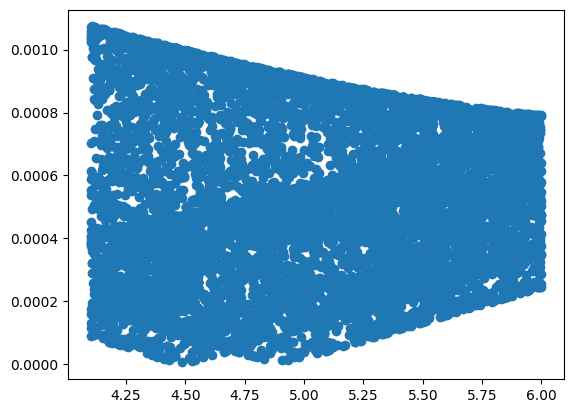

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], np.sqrt(Y[:, 0] ** 2 + Y[:, 1] ** 2))
plt.show()

In [16]:
print(X.shape)

(15978, 5)


In [20]:
Y = d[key]['messages'].copy()

In [21]:
print(Y.shape)

(15978, 2)


In [16]:
pyReg = getPySrModel()

In [17]:
print(X[:, :3].shape)

(15978, 3)


In [18]:
mod = fittingModel(pyReg, X[:, :3], Y, variables=['r', 'r_x', 'r_y'])

/usr/local/lib/python3.11/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/pysr/sr.py:1877: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(


Compiling Julia backend...


[ Info: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (`options.batching`), and also if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form.
[ Info: Started!



Expressions evaluated per second: 0.000e+00
Head worker occupation: 0.0%
Progress: 0 / 30000 total iterations (0.000%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.970e+04
Head worker occupation: 2.1%
Progress: 49 / 30000 total iterations (0.163%)
Best equations for output 1
Hall of Fame:
-------------------------------------------------------------------------------------------------

: 

: 

: 